In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

## Ребров. Домашка 7  


###  Задание 1   
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
Возьмём в ĸачестве признаĸа значение salary , а в ĸачестве целевой переменной -
scoring .
1. Найдите ĸоэффициенты линейной регрессии с помощью формул для парной
регрессии, а затем с помощью метода наименьших ĸвадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной
регрессии, полученную в п. 1.
3. Посчитайте ĸоэффициент детерминации, среднюю ошибĸу аппроĸсимации.
4. Оцените построенное уравнение регрессии с помощью F-ĸритерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте
для них доверительные интервалы с помощью t-статистиĸи Стьюдента.

In [78]:
salary = x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [79]:
#1
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)
print(f'Парная регрессия:\nb0 = {b0}\nb1 = {b1}')

Парная регрессия:
b0 = 444.1773573243596
b1 = 2.620538882402765


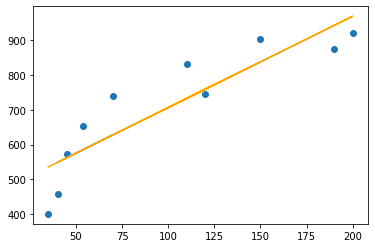

In [80]:
ox = x1
oy = b0 + b1 * ox
plt.scatter(x1, y1)
plt.plot(ox, oy, color='orange')

In [81]:
x1_ = pd.DataFrame(x1)
y1_ = pd.DataFrame(y1)

In [82]:
y1_.values.reshape(-1, 1)
x1_.values.reshape(-1, 1)

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [83]:
ones = np.ones((x1_.shape[0], 0))
x1_ = np.hstack((ones, x1_))

In [86]:
XTX = x1_.T.dot(x1_)
if np.linalg.det(XTX) != 0:
    print(f'определитель не равен 0. Определитель: {np.linalg.det(XTX)}')
else:
    print(f'определитель = 0')


определитель не равен 0. Определитель: 137765.99999999994


In [87]:
XTX

array([[137766.]])

In [88]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x1_.T).dot(y1_)
print(f'{XTX_inv}\nb = {b}')

[[7.25868502e-06]]
b = [[5.88982042]]


Мне кажется, я ошибся с методом наименьших квадратов, но не понимаю, где. Разве b не должно быть размером 2х1?

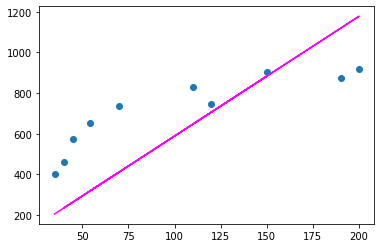

In [89]:
ox = x1_
oy = b * ox
plt.scatter(x1_, y1_)
plt.plot(ox, oy, color='magenta')

In [95]:
#3.1
z1 = b0 + b1 * x1
print(f'real: {y1[:y1.shape[0]]}\npredict: {z1[:z1.shape[0]]}')

real: [401 574 874 919 459 739 653 902 746 832]
predict: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [103]:
R2 = z1.var() / y1.var()
R2

0.7876386635293678

In [99]:
#3.2
def mean_approx_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [102]:
print(f'Средняя ошибка аппроксимации: {mean_approx_error(y1, z1)}')

Средняя ошибка аппроксимации: 0.11469251843561709


In [105]:
#4
k1 = 1
k2 = 10-2
T1 = (R2 / (1 - R2)) * (k2 / k1)
T1

29.67164085966437

In [107]:
!pip install scipy

In [111]:
from scipy import stats
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

T > Fкрит= 5.32

In [125]:
#5
def standart_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [126]:
S_slope = standart_error_slope(x1, y1, z1)
S_slope

0.48108279568516005

In [127]:
T = b1 / S_slope
T

5.447168150485579

Критическая область Ωα = (−∞, -2,306) ∪ (2,306, ∞) . T=5,44 попало в критическую область, значит b1 - значимо


In [134]:
t = 2.306
print(f'Доверительный интервал для b1: {(b1 - t * S_slope, b1 + t * S_slope)}')

Доверительный интервал для b1: (1.5111619555527858, 3.729915809252744)


In [135]:
def standard_error_intercept(x, y, z):
    return standart_error_slope(x, y, z) * np.sqrt((x ** 2).mean())


In [136]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [137]:
T = b0 / s_intercept
T

7.866210524668863

T попало в критическую область, значит b0 - значимо.

In [138]:
print(f'Доверительный интервал для b0: {(b0 - t * s_intercept, b0 + t * s_intercept)}')

Доверительный интервал для b0: (313.965613972488, 574.3891006762312)


### Задание 2  
Полагаю, подразумевается ответить на вопрос "в чем разница между использованием функции лапласа и критерия стьюдента"? потому что текущий вопрос подразумевает ответ вроде "пользуюсь таблицей квантилей стьюдента, когда использую критерий стьюдента". Отвечая же на вопрос о разнице между этими методами, функция лапласа используется, когда известна дисперсия, а критерий стьюдента, когда не известна.  